# Projeto eletromag - grupo 10 #

###### Integrantes: Alberto Carrera, Felipe Trintim, João Pedro Rodrigues, Matheus Castellucci 

### Etapa 1 ###

1)

para calcular a frequencia de ressonancia de um conjunto rlc, temos aa formula 

fr = 1/(2 * pi * sqrt(LC))

2)

In [113]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#indutâncias
L1 = 50e-3
L2 = L1

#resistências
R1 = 6
R2 = 3
Rc = 100

#frequência
f = 60

#capacitância
C1 = 1e-9
C2 = C1

fr=1/(2*pi*sqrt(L1*C1))
print(fr)

#tensão da fonte (pico)
Ufonte = 50
k = 0.5
M = k * sqrt(L1*L2)


(22507.90790392765+0j)


In [115]:
def CalcularTransformador(Uf, Rc, f):
    w = 2*pi*f
    XL1=1j*w*L1
    XL2=1j*w*L2
    XM=1j*w*M
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    paralelo = (XC2*Rc)/(XC2+Rc)
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

3)

In [116]:
listaf = np.arange(10000, 40000, 10)

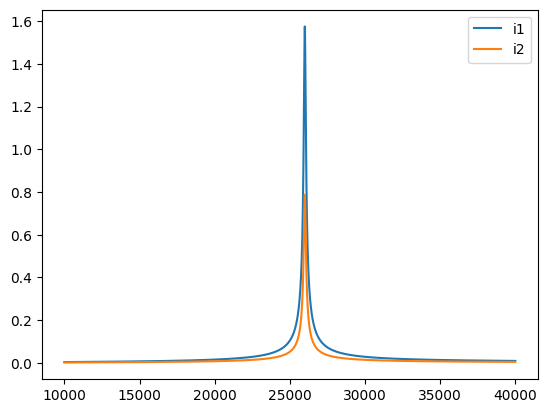

In [117]:
listai1 = []
listai2 = []
for f in listaf:
    i1, i2 = CalcularTransformador(Ufonte, Rc, f)
    listai1.append(abs(i1))
    listai2.append(abs(i2))

plt.plot(listaf, listai1, label="i1")
plt.plot(listaf, listai2, label="i2")
plt.legend()
plt.show()



4)

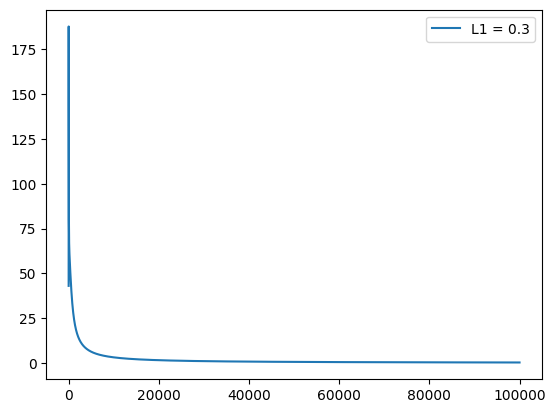

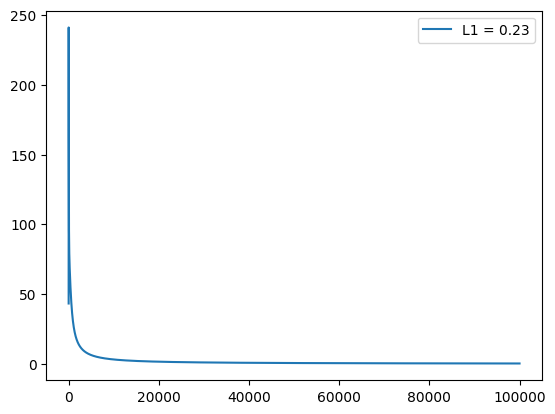

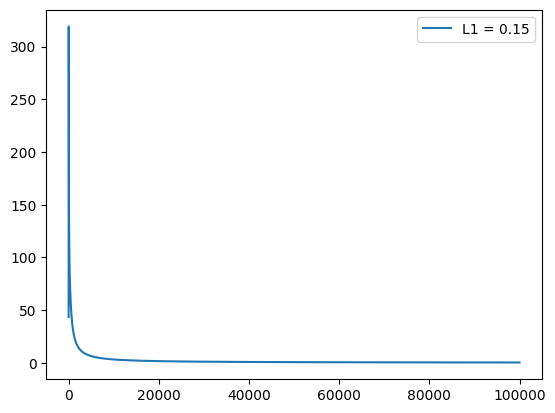

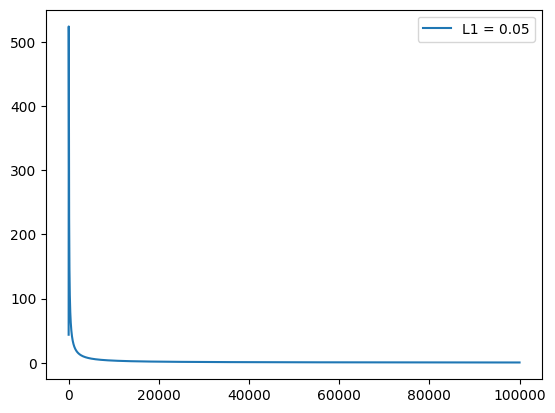

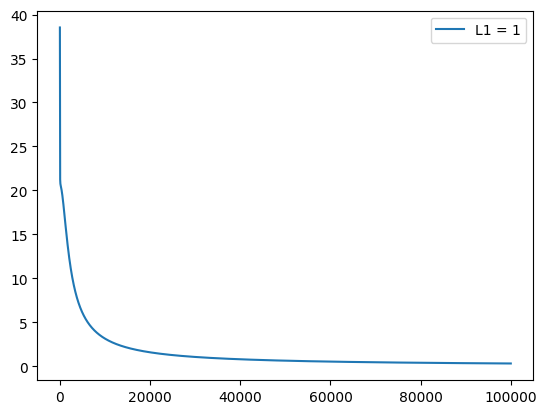

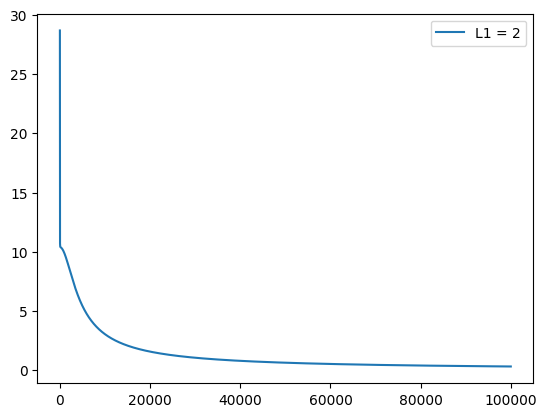

In [118]:
listal1 = [300e-3, 230e-3, 150e-3, 50e-3, 1, 2]
listafr = np.arange(1, 100000, 10)

for L1 in listal1:
    listav2 = []
    L2 = L1
    for fr in listafr:
        C1 = (1/(2*pi*fr))**2/L1
        C2 = C1
        i1, i2 = CalcularTransformador(Ufonte, Rc, fr)
        v2 = i2*Rc
        listav2.append(abs(v2))
    plt.plot(listafr, listav2, label="L1 = " + str(L1))
    plt.legend()
    plt.show()
